# Lab 0.5 - Manipulating Datasets with Pandas

## Objective
- Install and learn the basics of the `pandas` library.
- Manipulate and analyze datasets, finding basic statistics and adding/removing columns.
- Create data visualizations using `matplotlib`.

## Rubric
- 6 pts - Contains all required components and uses professional language and commenting
- 5 pts - Contains all required components, but uses unprofessional language, commenting, etc. 
- 4 pts - Contains some, but not all, of the required components
- 3 pts - Did not submit

# Instructions

Fill in the following code boxes. **Answer the numbered questions in comments next to the code you used to find the answer**.

# Problem 1: Weather Data

We are going to analyze the dataset you created. Use `import pandas as pd` to import the `pandas` library. Then use `df = pd.read_csv("filename.csv")` to create a `DataFrame` called `df`. 

In [6]:
import pandas as pd
df = pd.read_csv("weather.csv")

### `pandas` method reference

- `df.head(x)` and `df.tail(x)` will give you the first or the last `x` number of rows respectively
- `df.describe()` will give you a **five number summary** of the numeric columns
- `df.max()` and `.min()` will with you the maximum and the minimum of the column repectively
- `df[column]` will give you the column specified
- `df.iloc[index]` will give you the row at a given index
- `df.boxplot` will create a box plot of all numeric columns
- `df.sort_values(by=col, ascending=False)`sorts the values of the col in either ascending or descending order


1. What is the last entry in your table?

In [7]:
df.tail(1)

,datetime,temp_c,temp_f,humidity
23,2025-02-01 19:08:00,20.0,68.0,24.3%


2. What is the average temperature(either outside or inside) over your 40 hour period. What is the lowest temperature? What is the highest temperature? 

In [8]:
df.describe()

,temp_c
count,24.000000
mean,20.695833
std,0.746865
min,20.000000
25%,20.000000
50%,20.400000
75%,21.325000
max,22.200000


3. Create a boxplot of the temperatures.

In [9]:
df.boxplot

<bound method boxplot_frame of                datetime  temp_c      temp_f humidity
0   2025-01-31 20:31:00    21.7        71.1    22.5%
1   2025-01-31 21:01:00    21.7        71.1    21.9%
2   2025-01-31 22:07:00    22.1  71.8.22.0%      NaN
3   2025-01-31 23:02:00    21.5        70.7    20.9%
4   2025-02-01 00:02:00    21.3        70.3    21.6%
5   2025-02-01 01:07:00    22.2        72.0    22.5%
6   2025-02-01 02:07:00    21.4        70.5    22.5%
7   2025-02-01 03:02:00    21.1        70.0    22.7%
8   2025-02-01 04:02:00    21.0        69.8    22.9%
9   2025-02-01 05:12:00    20.7        69.3    23.0%
10  2025-02-01 06:07:00    20.6        69.1    23.1%
11  2025-02-01 07:02:00    20.5        68.9    23.2%
12  2025-02-01 08:07:00    20.3        68.5    23.1%
13  2025-02-01 09:02:00    20.3        68.5    23.2%
14  2025-02-01 10:02:00    20.1        68.2    23.3%
15  2025-02-01 11:07:00    20.1        68.2    23.4%
16  2025-02-01 12:03:00    20.1        68.2    23.5%
17  2025-02-01 

4. Create a plot of temperature over time with `matplotlib`. 

Import the library with `import matplotlib.pyplot as plt`. The `plot()` method creates a line graphs of temperature over time. Use `plt.plot(df['x_col'],df['y_col'],marker='h')` then `plt.show()` to create your plot of temperature over time. 

Before `plt.show()`, add the following methods to modify your graph. Remember, **good graphs always have axis labels, a title, clear units etc.**

```
plt.xlabel('') # labels the x-axis
plt.ylabel('') # labels the y-axis
plt.title('') # adds a graph title
plt.grid() # adds gridlines
plt.legend() # adds a legend
plt.xticks(rotation=90) # rotates the x-axis tick lables
plt.yticks(rotation=90) # rotates the y-axis tick lables
```

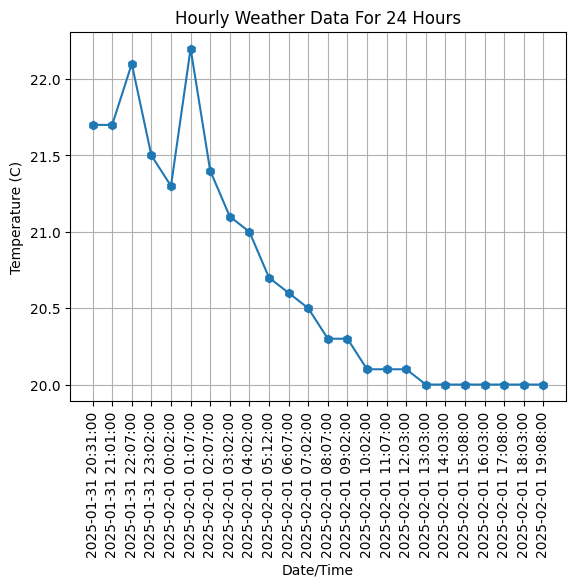

In [10]:
import matplotlib.pyplot as plt
plt.plot(df['datetime'],df['temp_c'],marker='h')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (C)')
plt.title('Hourly Weather Data For 24 Hours')
plt.grid()
plt.xticks(rotation=90)
plt.show()


5. Define a new column called `kelvin` which is your `celsius` column + 273.15. 

In [11]:
import csv

# Input and output file names
input_file = "weatherbackup.csv"
output_file = "sweater.csv"

# Read the original CSV and process the data
with open(input_file, mode='r', newline='') as infile:
    reader = csv.reader(infile)
    data = [row for row in reader]

    # Add header for Kelvin column
    data[0].append("temp_k")

    # Convert Celsius to Kelvin and append
    for row in data[1:]:
        temp_c = float(row[1])  # Celsius temperature
        temp_k = temp_c + 273.15  # Convert to Kelvin
        row.append(f"{temp_k:.2f}")  # Append formatted Kelvin value

# Write the updated data to a new CSV file
with open(output_file, mode='w', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerows(data)

print(f"Updated file saved as {output_file}")


Updated file saved as sweater.csv


6. Get the record(row) at 2:30PM 


In [12]:
import pandas as pd

# Load the CSV file into a sweater weather
df = pd.read_csv("sweater.csv")

# Convert the 'datetime' column to datetime format
df["datetime"] = pd.to_datetime(df["datetime"])

# Filter rows where the time is 02:30 (ignoring the date)
filtered_rows = df[df["datetime"].dt.strftime("%H:%M") == "02:07"]

# Print results
if not filtered_rows.empty:
    print("Data at 2:07:\n", filtered_rows)
else:
    print("No data found for 2:07.")


Data at 2:07:
              datetime  temp_c temp_f humidity  temp_k
6 2025-02-01 02:07:00    21.4   70.5    22.5%  294.55


# Problem 2: Population Data

In this example we will fetch data about countries and their predicted populations from [Wikipedia](http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population).

I have done the web scraping and creation of a `DataFrame`,`df_a`.

In [13]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup


url = 'http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population'
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")

tbody = soup.find_all("tbody")
tr = tbody[0].find_all("tr")
arr = []
mat = []
for t in tr:
    lst = t.text.split("\n")
    for l in lst:
        if l == "":
            if arr != []:
                arr = arr[0:2] + arr[2::2]
                mat.append(arr)
                arr = []
        else:
            try:
                arr.append(int(l.lstrip('\xa0').replace(",","")))
            except ValueError:
                arr.append(str(l.lstrip('\xa0').replace(",","")))
titles = mat[0]
titles[0] = "countries"
mat = mat[1:]
df_a = pd.DataFrame.from_records(mat, columns=titles)
print(df_a)

                       countries        2024        2030         2100
0                          World  8118836000  8546141000  10349323000
1                           Asia  4785060000  4958807000   4674249000
2                         Africa  1494994000  1710666000   3924421000
3             Sub-Saharan Africa  1226534000  1417346000   3442347000
4    Central Asia and South Asia  2128585000  2258687000   2559659000
..                           ...         ...         ...          ...
253                    Venezuela    29395334    32027461     35353213
254                      Vietnam    99497680   102699905     91036732
255                        Yemen    35219853    39923245     74176034
256                       Zambia    21314956    25024901     64473916
257                     Zimbabwe    16634373    18610348     37166572

[258 rows x 4 columns]


1. A 5 number summary of `df_a`

In [14]:
print(df_a.describe())

               2024          2030          2100
count  2.580000e+02  2.580000e+02  2.580000e+02
mean   1.409838e+08  1.483421e+08  1.758736e+08
std    6.587727e+08  6.906787e+08  8.173571e+08
min    5.260000e+02  5.610000e+02  1.237000e+03
25%    5.999040e+05  6.259820e+05  6.768595e+05
50%    6.893438e+06  7.254900e+06  8.156020e+06
75%    3.483818e+07  3.830878e+07  5.201191e+07
max    8.118836e+09  8.546141e+09  1.034932e+10


2. How is the `DataFrame` currently indexed? If it is not already, make the `countries` column the index.

In [15]:
#Currently they are indexed by assigning a random number to each country, and then each nation is displayed based on it's number.
df_a.set_index('countries',inplace=True)
print(df_a)

                                   2024        2030         2100
countries                                                       
World                        8118836000  8546141000  10349323000
Asia                         4785060000  4958807000   4674249000
Africa                       1494994000  1710666000   3924421000
Sub-Saharan Africa           1226534000  1417346000   3442347000
Central Asia and South Asia  2128585000  2258687000   2559659000
...                                 ...         ...          ...
Venezuela                      29395334    32027461     35353213
Vietnam                        99497680   102699905     91036732
Yemen                          35219853    39923245     74176034
Zambia                         21314956    25024901     64473916
Zimbabwe                       16634373    18610348     37166572

[258 rows x 3 columns]


3. What is the largest population listed for 2030?

In [16]:
highest=0
for high in df_a[2030]:
    if high > highest:
        highest=high
print(highest)

8546141000


4. What was the population of Austria from now to 2100?

In [17]:
row=df_a.loc["Austria"]
print("Population in 2024; "+str(row[2024]))
print("Population in 2030; "+str(row[2030]))
print("Population in 2100; "+str(row[2100]))



Population in 2024; 9120813
Population in 2030; 9080346
Population in 2100; 7399328


5. What will the population be of France in 2030?

In [18]:
row = df_a.loc["France"]
print("The population of France in 2030 will be: "+str(row[2030]))

The population of France in 2030 will be: 65543452


6. What 5 entries will have the highest population in 2100? Display their records.

In [19]:
print((df_a[2100]).sort_values(ascending=False).head(5))

countries
World                          10349323000
Asia                            4674249000
Africa                          3924421000
Sub-Saharan Africa              3442347000
Central Asia and South Asia     2559659000
Name: 2100, dtype: int64


7. What was country with the smallest population in 2024?

In [20]:
print(df_a[2024].sort_values(ascending=False).tail(1))

countries
Vatican City    526
Name: 2024, dtype: int64


8. Create a plot with `plot()` to compare the population of Austria, Germany, United States, and France from 2024-2100. Your graph needs to include a  proper title, axis labels, and legend.

/tmp/ipykernel_663/2968795923.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


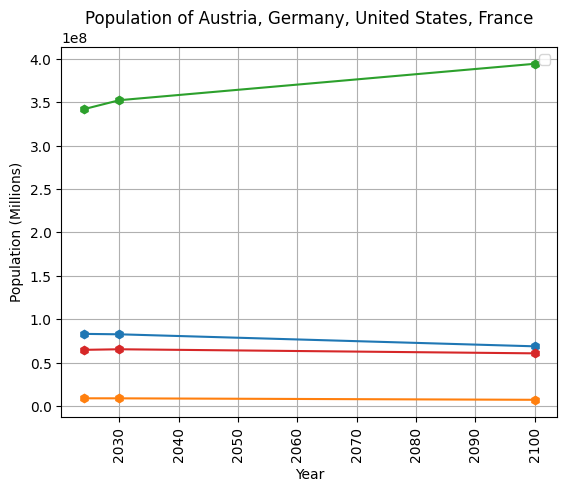

In [34]:
import matplotlib.pyplot as plt
plt.plot(df_a.loc['Germany'], marker="h")
plt.plot(df_a.loc["Austria"], marker="h")
plt.plot(df_a.loc["United States"], marker="h")
plt.plot(df_a.loc["France"], marker="h")
plt.xlabel('Year')
plt.ylabel('Population (Millions)')
plt.title('Population of Austria, Germany, United States, France')
plt.grid()
plt.xticks(rotation=90)
plt.show()